In [1]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
import scipy.interpolate as interp
from scipy.io import loadmat 
tf.config.run_functions_eagerly(True)

In [2]:
seq_names = ['S1','S3','S5']

In [3]:
N_A = 6e23
bO = 5.803e-5 # angstrom
bC = 6.6460e-5
bS = 2.847e-5
bN = 9.36e-5
bD = 6.671e-5
bH = -3.7390e-5
bpol = ((bC+bH*3+bC+bO)
        +(bN+(bC*10+bH*21)+bC+bH*2+bC+bO)*5
        +(bN+(bC*2+bH*4+bO+bC+bH*3)+bC+bH*2+bC+bO)*19
        +(bN+bC*3+bH*4+bO*2)+bC+bH*2+bC+bO+(bN+bH*2)       
       )
# bpol = bC*162 + bH*297 + bN*26 + bO*47
bH2O = 2*bH + bO
bD2O = 2*bD + bO
Mw = 3361.29
     #((12+1*3+12+16)
      #+(14+(12*10+1*21)+12+1*2+12+16)*5
      #+(14+(12*2+1*4+16+12+1*3)+12+1*2+12+16)*19
      #+(14+12*3+1*4+16*2)+12+1*2+12+16+(14+1*2)       
      #)
vu = Mw/0.99/N_A/1e-24 # angstrom^3
vw = 18/1/N_A/1e-24
Conc = 3e-3/Mw/1e24*N_A # angstrom-^3 

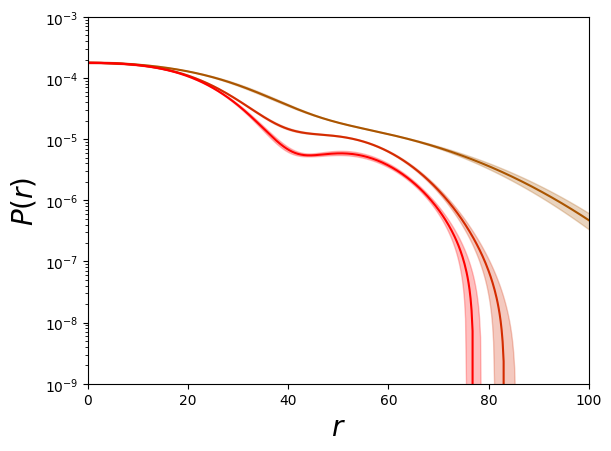

In [4]:
r = (np.arange(1000)+1)/5
fig,ax = plt.subplots(1,1, figsize=[6.4, 4.8])
plt.rcParams['font.size'] = '16'
for i, seq_name in enumerate(seq_names):
    fp_path = './fp/' + seq_name + '/'
    loaded_data = loadmat(fp_path + 'parameters.mat')
    P = loaded_data['P'][0]
    P_er = loaded_data['P_er'][0]

    
    # P(r)
    ax.fill_between(r,P-P_er,P+P_er,color=(((i+1)/6)+0.5,(0.5-(i+1)/6),0),alpha=0.25)
    ax.plot(r,P,color=(((i+1)/6)+0.5,(0.5-(i+1)/6),0))
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(0, 100)
    ax.set_ylim(1e-9, 1e-3)
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$P(r)$')
    ax.set_xlabel(r'$r$',fontsize=20)
    ax.set_ylabel(r'$P(r)$',fontsize=20)
    
pngname = './figures/P.png'
fig.tight_layout()
# plt.savefig(pngname)
plt.show()

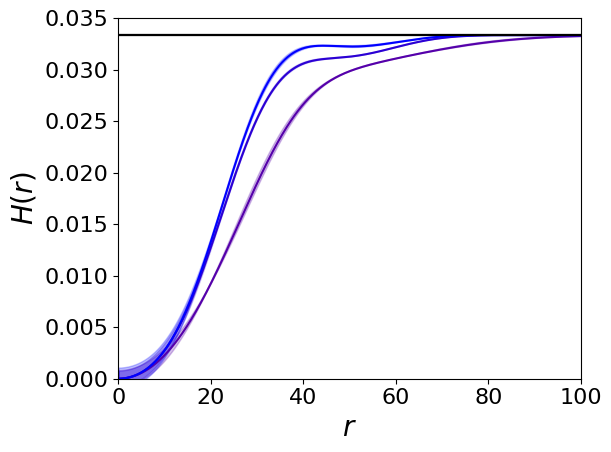

In [5]:
r = (np.arange(1000)+1)/5
fig,ax = plt.subplots(1,1, figsize=[6.4, 4.8])
plt.rcParams['font.size'] = '16'
for i, seq_name in enumerate(seq_names):
    fp_path = './fp/' + seq_name + '/'
    loaded_data = loadmat(fp_path + 'parameters.mat')
    H = loaded_data['H'][0]
    H_er = loaded_data['H_er'][0]

    
    # H(r)
    ax.fill_between(r,H-H_er,H+H_er,color=((0.5-(i+1)/6),0,((i+1)/6)+0.5),alpha=0.25)
    ax.plot(r,H,color=((0.5-(i+1)/6),0,((i+1)/6)+0.5))
    ax.plot(r,np.ones(r.shape)*(1/vw),'k')
    #ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 0.035)
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$H(r)$')
    ax.set_xlabel(r'$r$',fontsize=20)
    ax.set_ylabel(r'$H(r)$',fontsize=20)
    
pngname = './figures/H.png'
fig.tight_layout()
# plt.savefig(pngname)
plt.show()